In [1]:
import pandas as pd

In [2]:
with open('../data/slurm_wrapper_ce5.log') as f:
    data5 = ([line.split() for line in f])

In [3]:
ce5 = pd.DataFrame([[x[0] + 'T' + x[1], x[4], float(x[10]), int(x[13]), ''.join(x[16:])] 
                       for x in data5], columns=['BEGIN', 'USER', 'DURATION', 'RC', 'COMMAND'])

In [6]:
ce5 = ce5.sort_values('BEGIN').reset_index()

In [7]:
ce5['value_grp'] = (ce5.RC.diff(1) != 0).cumsum()

In [8]:
codes_grouped = pd.DataFrame({'Sindex' : ce5.groupby('value_grp').index.first(),
            'BeginDate' : ce5.groupby('value_grp').BEGIN.first(), 
              'EndDate' : ce5.groupby('value_grp').BEGIN.last(),
              'Consecutive' : ce5.groupby('value_grp').size(), 
              'Returncode' : ce5.groupby('value_grp').RC.first()})\
            .sort_values('Consecutive', ascending=False)

In [21]:
rc_1 = codes_grouped[codes_grouped['Returncode'] == 1].sort_values('BeginDate', ascending=False)
rc_1

,Sindex,BeginDate,EndDate,Consecutive,Returncode
value_grp,,,,,
271238,4761585,2021-10-06T15:39:21.276267,2021-10-06T15:39:21.276267,1,1
271236,4761575,2021-10-06T15:39:19.936025,2021-10-06T15:39:20.070326,3,1
271234,4761570,2021-10-06T15:39:19.820597,2021-10-06T15:39:19.882645,4,1
271232,4761568,2021-10-06T15:39:19.714047,2021-10-06T15:39:19.714047,1,1
271230,4761564,2021-10-06T15:39:19.531371,2021-10-06T15:39:19.632385,3,1
...,...,...,...,...,...
10,515,2020-10-16T08:55:47.640152,2020-10-16T08:55:47.700888,3,1
8,506,2020-10-16T08:55:14.136565,2020-10-16T08:55:14.199320,3,1
6,495,2020-10-16T08:54:19.220501,2020-10-16T08:54:19.800110,3,1


In [30]:
first_error = ce5.join(rc_1['Sindex'].to_frame().set_index('Sindex'), how='inner')

In [47]:
fe_df['COMMAND'].value_counts()

['/usr/bin/scontrol','show','job']                   9875
['/usr/bin/squeue','-o','%i%T','-u','cmspilot']       579
['/usr/bin/squeue','-o','%i%T','-u','lscpilot']       548
['/usr/bin/squeue','-o','%i%T','-u','cmslocal']       139
['/usr/bin/squeue','-o','%i%T','-u','uscmslocal']     121
                                                     ... 
['/usr/bin/scontrol','show','job','29083053']           1
['/usr/bin/scontrol','show','job','29089389']           1
['/usr/bin/scontrol','show','job','29103717']           1
['/usr/bin/scontrol','show','job','29089548']           1
['/usr/bin/scontrol','show','job','24960943']           1
Name: COMMAND, Length: 114393, dtype: int64

In [48]:
ce5['COMMAND'].value_counts()

['/usr/bin/scontrol','show','job']                                                                      551116
['/usr/bin/squeue','-o','%i%T','-u','cmspilot']                                                          59796
['/usr/bin/squeue','-o','%i%T','-u','lscpilot']                                                          56818
['/usr/bin/squeue','-o','%i%T','-u','uscmslocal']                                                        24164
['/usr/bin/squeue','-o','%i%T','-u','cmslocal']                                                          23133
                                                                                                         ...  
['/usr/bin/sacct','-j','26836699','--noconvert','-P','--format','UserCPU,SystemCPU,MaxRSS,ExitCode']         1
['/usr/bin/sacct','-j','26836681','--noconvert','-P','--format','UserCPU,SystemCPU,MaxRSS,ExitCode']         1
['/usr/bin/sacct','-j','26836687','--noconvert','-P','--format','UserCPU,SystemCPU,MaxRSS,ExitCode']         1
[

In [49]:
579/9875

0.05863291139240506

In [50]:
59796/551116

0.1084998439529972

In [52]:
fe_df['USER'].value_counts()

9201    82448
9202    13890
9204    13200
9203    12777
9221     6579
9219     4458
Name: USER, dtype: int64

In [53]:
ce5['USER'].value_counts()

9201      3093747
9202       639795
9203       386689
9221       312727
9219       178075
9204       159847
0               8
112870          5
Name: USER, dtype: int64

In [56]:
fe_df[(fe_df['USER'] == '9201') & (fe_df['COMMAND'] == "['/usr/bin/scontrol','show','job']")]

,index,BEGIN,USER,DURATION,RC,COMMAND,value_grp
4222824,4222824,2021-08-20T11:51:44.018754,9201,20.126880,1,"['/usr/bin/scontrol','show','job']",241994
4203615,4203615,2021-08-18T18:52:05.823883,9201,20.109616,1,"['/usr/bin/scontrol','show','job']",240832
4203017,4203017,2021-08-18T18:21:27.228571,9201,20.083291,1,"['/usr/bin/scontrol','show','job']",240803
4201989,4201989,2021-08-18T16:14:32.696896,9201,20.310488,1,"['/usr/bin/scontrol','show','job']",240731
4184640,4184640,2021-08-16T21:28:11.946093,9201,20.064822,1,"['/usr/bin/scontrol','show','job']",240063
...,...,...,...,...,...,...,...
79210,79210,2020-10-19T18:11:20.946013,9201,20.035136,1,"['/usr/bin/scontrol','show','job']",2812
78601,78601,2020-10-19T17:43:19.300143,9201,20.037590,1,"['/usr/bin/scontrol','show','job']",2777
78525,78525,2020-10-19T17:37:49.664960,9201,20.019689,1,"['/usr/bin/scontrol','show','job']",2772
62119,62119,2020-10-19T00:35:10.359060,9201,20.036096,1,"['/usr/bin/scontrol','show','job']",2313


In [75]:
ce5[ce5['COMMAND'] == "['/usr/bin/scontrol','show','job']"]['DURATION'].mean()

5.298906180702769

<AxesSubplot:>

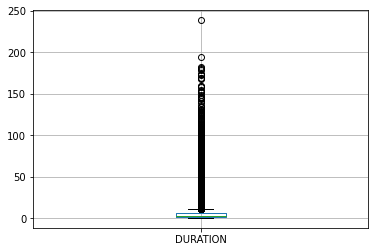

In [76]:
ce5[ce5['COMMAND'] == "['/usr/bin/scontrol','show','job']"].boxplot('DURATION')

In [82]:
len(ce5[(ce5['COMMAND'] == "['/usr/bin/scontrol','show','job']") & (ce5['RC'] == 0)])

529019

In [ ]:
len(ce5[(ce5['COMMAND'] == "['/usr/bin/scontrol','show','job']") & (ce5['RC'] == 0)])

In [84]:
ce5[(ce5['COMMAND'] == "['/usr/bin/scontrol','show','job']")]['RC'].value_counts()

0    529019
1     22097
Name: RC, dtype: int64

In [86]:
ce5[(ce5['COMMAND'] == "['/usr/bin/scontrol','show','job']") & (ce5['RC'] == 0)].sort_values('DURATION')

,index,BEGIN,USER,DURATION,RC,COMMAND,value_grp
3024240,3024240,2021-05-24T09:31:37.819521,9204,0.235798,0,"['/usr/bin/scontrol','show','job']",183634
3024213,3024213,2021-05-24T09:23:25.986900,9201,0.239207,0,"['/usr/bin/scontrol','show','job']",183634
3023625,3023625,2021-05-24T06:39:07.701782,9202,0.241251,0,"['/usr/bin/scontrol','show','job']",183634
3024305,3024305,2021-05-24T09:52:36.298149,9202,0.242090,0,"['/usr/bin/scontrol','show','job']",183634
3023163,3023163,2021-05-24T04:25:17.462044,9221,0.242871,0,"['/usr/bin/scontrol','show','job']",183634
...,...,...,...,...,...,...,...
3390583,3390583,2021-06-23T14:44:34.202799,9204,179.538662,0,"['/usr/bin/scontrol','show','job']",191980
878160,878160,2020-11-30T09:46:12.212069,9202,180.403287,0,"['/usr/bin/scontrol','show','job']",38771
3399340,3399340,2021-06-23T17:45:49.864140,9221,182.130856,0,"['/usr/bin/scontrol','show','job']",193044
3398837,3398837,2021-06-23T17:15:39.115343,9221,194.596259,0,"['/usr/bin/scontrol','show','job']",192940


In [78]:
ce5[(ce5['COMMAND'] == "['/usr/bin/scontrol','show','job']")]


,index,BEGIN,USER,DURATION,RC,COMMAND,value_grp
99,99,2020-10-16T08:33:16.752867,9203,7.501315,0,"['/usr/bin/scontrol','show','job']",1
104,104,2020-10-16T08:33:49.959221,9219,5.847776,0,"['/usr/bin/scontrol','show','job']",1
105,105,2020-10-16T08:33:57.037447,9202,6.994174,0,"['/usr/bin/scontrol','show','job']",1
106,106,2020-10-16T08:33:58.401593,9201,6.699294,0,"['/usr/bin/scontrol','show','job']",1
198,198,2020-10-16T08:35:50.747136,9204,8.597585,0,"['/usr/bin/scontrol','show','job']",1
...,...,...,...,...,...,...,...
4334723,4334723,2021-08-23T13:55:26.630698,9221,10.757977,0,"['/usr/bin/scontrol','show','job']",255043
4334724,4334724,2021-08-23T13:55:28.376246,9201,5.341769,0,"['/usr/bin/scontrol','show','job']",255043
4334727,4334727,2021-08-23T13:56:43.442305,9202,4.571947,0,"['/usr/bin/scontrol','show','job']",255043
4334728,4334728,2021-08-23T13:56:45.676228,9201,4.731268,0,"['/usr/bin/scontrol','show','job']",255043


In [96]:
tmp = ce5[~(ce5['COMMAND'] == "['/usr/bin/scontrol','show','job']")]


In [ ]:
tmp[tmp['COMMAND'].str.contains("show")]['DURATION'].mean()

<AxesSubplot:>

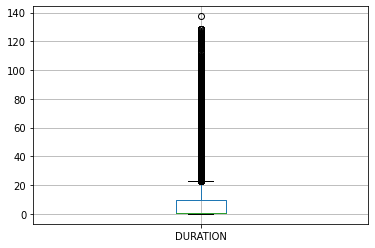

In [106]:
tmp[tmp['COMMAND'].str.contains("show")].boxplot('DURATION')

<AxesSubplot:>

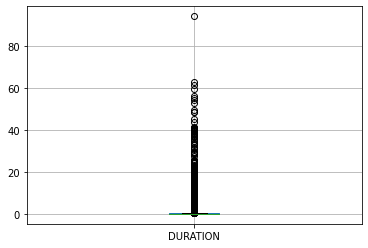

In [107]:
ce5[(ce5['COMMAND'] == "['/usr/bin/squeue','-o','%i%T','-u','cmspilot']")].boxplot('DURATION')


In [109]:
ce5[(ce5['COMMAND'] == "['/usr/bin/squeue','-o','%i%T','-u','cmspilot']")]['DURATION'].mean()


1.040232576517064

<AxesSubplot:>

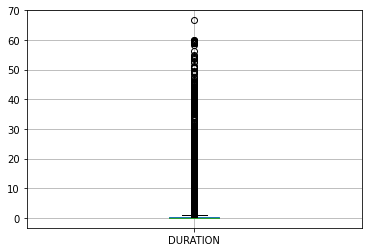

In [110]:
ce5[ce5['COMMAND'].str.contains("sbatch")].boxplot('DURATION')